In [210]:
import requests
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [211]:
api_link = 'http://api.football-data.org/v1/teams/'
token = str()
with open('.token.txt') as file:
    token = file.read()

api_params = {
    'X-Auth-Token': token.rstrip(),
}

In [212]:
def get_team_stats(team_id, name):
    losts = 0
    wins = 0
    goals_made = 0
    goals_got = 0
    res = requests.get(api_link + str(team_id) + '/fixtures', headers=api_params)
    data = res.json()
    for game in data['fixtures']:
        if game['status'] != 'FINISHED':
            continue
        if game['homeTeamName'] == name:
            goals_made += game['result']['goalsHomeTeam']
            goals_got += game['result']['goalsAwayTeam']
            if game['result']['goalsHomeTeam'] > game['result']['goalsAwayTeam']:
                wins = wins + 1
            elif game['result']['goalsHomeTeam'] < game['result']['goalsAwayTeam']:
                losts = losts + 1
        else:
            goals_made += game['result']['goalsAwayTeam']
            goals_got += game['result']['goalsHomeTeam']
            if game['result']['goalsHomeTeam'] > game['result']['goalsAwayTeam']:
                losts = losts + 1
            elif game['result']['goalsHomeTeam'] < game['result']['goalsAwayTeam']:
                wins = wins + 1
    return {'wins': wins, 'losts': losts, 'goals_made': goals_made, 'goals_got': goals_got, 'total_games': data['count']}

In [213]:
def get_team_data(amount):
    result = list()
    for team_id in range(1, amount + 1):
        res = requests.get(api_link + str(team_id), headers=api_params)
        data = res.json()
        if 'error' in data:
            continue
        if data['squadMarketValue'] == None:
            value = random.randint(100000, 2000000)
        else:
            value = data['squadMarketValue']
        stats = get_team_stats(team_id, data['name'])
        if stats['total_games'] != 0:
            result.append({'Name': data['name'], 'Wins': stats['wins'], 'Goals_diff': stats['goals_made'] - stats['goals_got'] })
    return result

In [214]:
data = get_team_data(20)
table = pd.DataFrame(data)
table.head(10)

,Goals_diff,Name,Wins
0,-16,1. FC Köln,5
1,-3,TSG 1899 Hoffenheim,9
2,19,Bayer Leverkusen,13
3,21,Borussia Dortmund,13
4,61,FC Bayern München,28
5,12,FC Schalke 04,14
6,-18,Hamburger SV,4
7,2,Hannover 96,9
8,0,Hertha BSC,8
9,-8,VfB Stuttgart,9


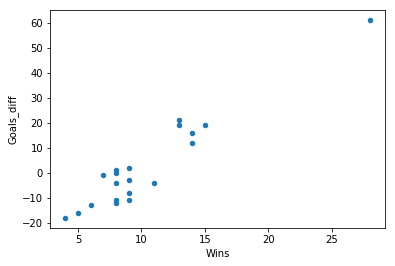

In [215]:
table.plot.scatter(x='Wins', y='Goals_diff')

In [216]:
del table['Name']
whitened = whiten(table.as_matrix())
centroids3, cluster_map3 = kmeans2(whitened, 3)
centroids5, cluster_map5 = kmeans2(whitened, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors3 = [colors_map[c] for c in cluster_map3]
colors5 = [colors_map[c] for c in cluster_map5]

/Users/Jack/anaconda3/lib/python3.6/site-packages/scipy/cluster/vq.py:523: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


3 football clubs clusters

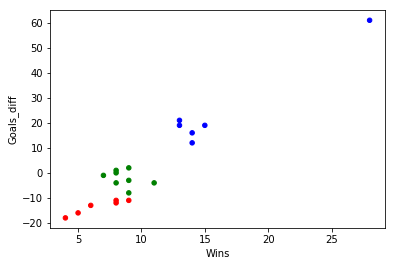

In [217]:
table.plot.scatter(x='Wins', y='Goals_diff', c=colors3)

5 football clubs clusters

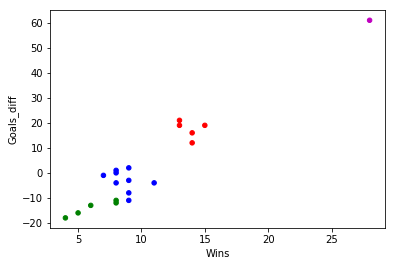

In [218]:
table.plot.scatter(x='Wins', y='Goals_diff', c=colors5)